In [ ]:
Step 1 - Split data into test and training
Step 2 - From Training Data, extract rows where we have 25000 + rows separately as a dataframe and the remaining rows as a dataframe


In [1]:
#!/usr/bin/env python3
#### Import all the required libraries
import pandas as pd #### Library for working with large datsets
import numpy as np #### Library for performing numerical calculations
import matplotlib.pyplot as plt #### Baasic Library for plotting graphs
#### Configuring Matplotlib to show Plots inline
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12, 12) ### Setting the size of the Plots

In [2]:
data = pd.read_csv('h1n1_vaccine_prediction.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [4]:
data = data[['unique_id',
'h1n1_worry',
'h1n1_awareness',
'antiviral_medication',
'contact_avoidance',
'bought_face_mask',
'wash_hands_frequently',
'avoid_large_gatherings',
'reduced_outside_home_cont',
'avoid_touch_face',
'is_h1n1_vacc_effective',
'is_h1n1_risky',
'sick_from_h1n1_vacc',
'is_seas_vacc_effective',
'is_seas_risky',
'sick_from_seas_vacc',
'age_bracket',
'race',
'sex',
'census_msa',
'no_of_adults',
'no_of_children',
'h1n1_vaccine']]


In [5]:
#### Lets ensure our data doesnt contain any Null Values
nans = lambda data: data[data.isnull().any(axis=1)]
tmp = nans(data)
data = data.drop(tmp.index,0)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25238 entries, 0 to 26706
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  25238 non-null  int64  
 1   h1n1_worry                 25238 non-null  float64
 2   h1n1_awareness             25238 non-null  float64
 3   antiviral_medication       25238 non-null  float64
 4   contact_avoidance          25238 non-null  float64
 5   bought_face_mask           25238 non-null  float64
 6   wash_hands_frequently      25238 non-null  float64
 7   avoid_large_gatherings     25238 non-null  float64
 8   reduced_outside_home_cont  25238 non-null  float64
 9   avoid_touch_face           25238 non-null  float64
 10  is_h1n1_vacc_effective     25238 non-null  float64
 11  is_h1n1_risky              25238 non-null  float64
 12  sick_from_h1n1_vacc        25238 non-null  float64
 13  is_seas_vacc_effective     25238 non-null  flo

In [7]:
data.census_msa.unique()

array(['Non-MSA', 'MSA, Not Principle  City', 'MSA, Principle City'],
      dtype=object)

In [8]:
### In this dataset we have the dependant variable being 'yes' or 'no', lets convert it to 1 or 0
clean_up_categoricals = {'age_bracket':{'18 - 34 Years':1, '35 - 44 Years':2, '45 - 54 Years':3, '55 - 64 Years':4,
                                       '65+ Years':5},
                         'race' :{"White":1, "Black":2,"Hispanic":3,"Other or Multiple":4},
                        'sex':{'Female':0,'Male':1},
                        'census_msa':{'Non-MSA':1,'MSA, Not Principle  City':2,'MSA, Principle City':3}}
data.replace(clean_up_categoricals, inplace=True)
data.head(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2.0,1.0,2.0,4,1,0,1,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,4.0,2.0,4.0,2,1,1,2,0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,4.0,1.0,2.0,1,1,1,2,2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,5.0,4.0,1.0,5,1,0,3,0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,1.0,4.0,3,1,0,2,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,5.0,4.0,4.0,5,1,1,3,2.0,3.0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,1.0,4,1,1,2,0.0,0.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,4.0,2.0,1.0,3,1,0,1,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,4.0,2.0,1.0,3,1,1,2,1.0,0.0,0
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,4.0,2.0,2.0,4,1,1,2,0.0,0.0,0


In [9]:
#### Extract Y & X from Data
Y = data['h1n1_vaccine'].values
X = data
X = X.drop('unique_id','h1n1_vaccine',1)

#### Split X & Y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [10]:
#### Feature Scaling - Lets scale the Features to ensure they are all in the same range
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [11]:
# Fitting Logistic Regression Classifier to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

In [12]:
#### Fit the classifier to the training set
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
### Predict the results
y_pred = classifier.predict(X_test)

In [44]:
y_pred[0:3]

array([0, 1, 0], dtype=int64)

In [45]:
#### Predicting Probablities for 0 & 1
y_proba = classifier.predict_proba(X_test)
y_proba[0:3]

array([[0.69181853, 0.30818147],
       [0.36559124, 0.63440876],
       [0.78811823, 0.21188177]])

In [66]:
### Predict the result for a custom threshold
THRESHOLD = 0.17
y_pred1 = np.where(classifier.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

In [49]:
y_pred1[0:3]

array([1, 1, 0])

In [52]:
### Lets create a Confusion Matrix to See how valid our accuracy score is
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm:
    print(*line)

print("###################-Custom Threshold")
cm1 = confusion_matrix(y_test, y_pred1)
labels =['Pr 0', 'Pr 1']
print(*labels)
for line in cm1:
    print(*line)

Pr 0 Pr 1
3766 215
778 289
###################-Custom Threshold
Pr 0 Pr 1
2575 1406
244 823


In [ ]:
###################-Custom Threshold 0.20
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      3981
           1       0.39      0.73      0.51      1067

###################-Custom Threshold 0.19
              precision    recall  f1-score   support

           0       0.91      0.67      0.77      3981
           1       0.38      0.75      0.50      1067


###################-Custom Threshold 0.18
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      3981
           1       0.37      0.77      0.50      1067
            
###################-Custom Threshold 0.17
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      3981
           1       0.36      0.79      0.49      1067

        
###################-Custom Threshold 0.16
              precision    recall  f1-score   support

           0       0.92      0.59      0.72      3981
           1       0.35      0.81      0.49      1067

In [67]:
#### Lets take a look at the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print("###################-Custom Threshold")
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3981
           1       0.57      0.27      0.37      1067

    accuracy                           0.80      5048
   macro avg       0.70      0.61      0.63      5048
weighted avg       0.77      0.80      0.77      5048

###################-Custom Threshold
              precision    recall  f1-score   support

           0       0.92      0.62      0.74      3981
           1       0.36      0.79      0.49      1067

    accuracy                           0.66      5048
   macro avg       0.64      0.70      0.62      5048
weighted avg       0.80      0.66      0.69      5048



In [41]:
#### Lets plot the ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.775


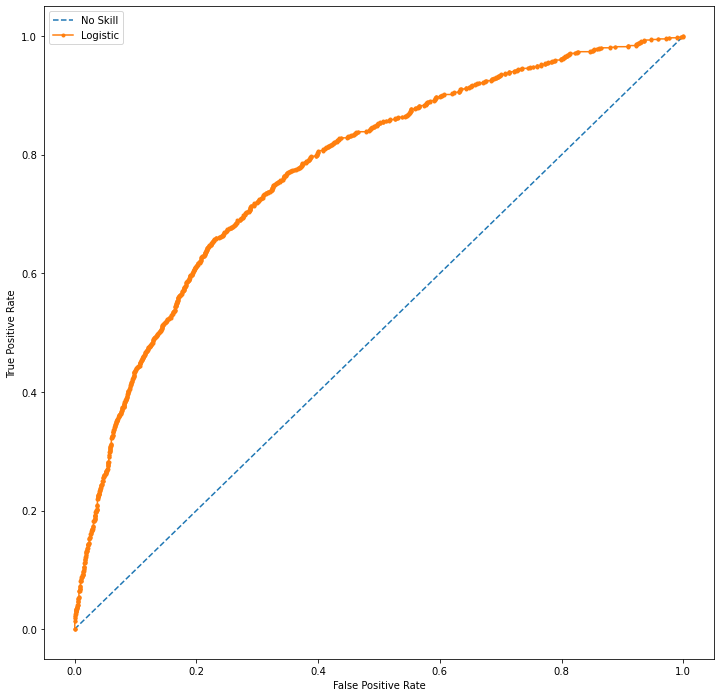

In [39]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

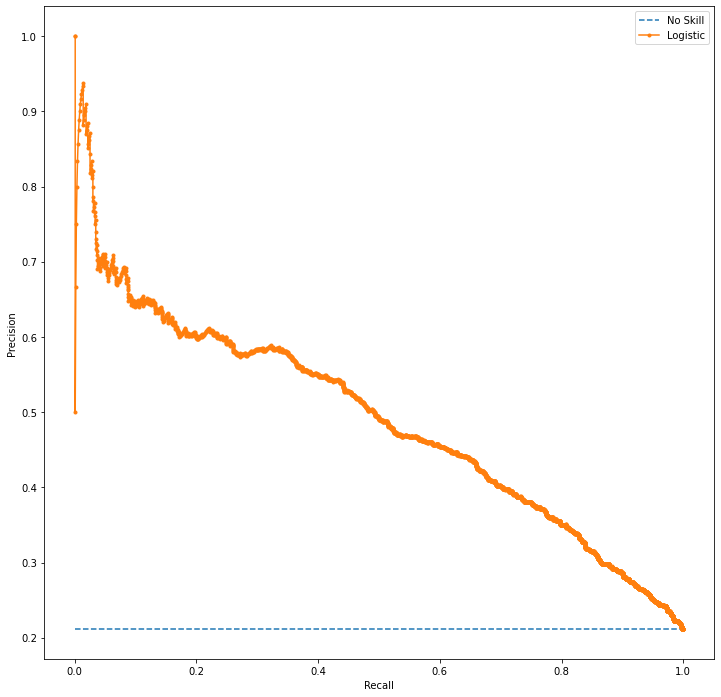

In [42]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, lr_probs)
no_skill = len(y_test[y_test==1]) / len(y_test)

plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()